![Ubco Logo](https://raw.githubusercontent.com/nick3516/ENGR491/main/UBCOLOGO.png?token=AUW5UKQEPXCKANOAPHL4DZDBOYYC4)
# ENGR 491 : Theory Exercise 3
## Nicholas Sewell - 89173397
### Oct 23rd 2021
---

## Introduction

In this report, the convection of a wave in an inviscid medium will be analyzed using three explicit finite-differencing schemes. 
This is done with a one-dimensional, non-linear convection equation.
$$ \dfrac{\partial u}{\partial t} + u \dfrac{\partial u}{\partial x} = 0 $$

In conservation form, this equation can be expressed as:
$$ \dfrac{\partial u}{\partial t} + \dfrac{\partial F}{\partial x} = 0 $$

where $F$ is a conserved flux vector, $F = u^2 / 2$. The equation can also be re-expressed in conservation form by defining a flux Jacobian $A = \partial F / \partial u$:
$$ \dfrac{\partial u}{\partial t} + A \dfrac{\partial u}{\partial x} = 0. $$
In the one-dimensional case considered here, $A = \partial F / \partial u = u$.


## Problem Statement

The following system will be solved with three different schemes:
$$ u(x,0) = \sin(x) + 0.5 \sin(0.5 x)$$
in the domain $0 \leq x \leq 2\pi$, with a step size of $\Delta t = 0.1$

In this report, the following three explicit schemes will be performed
1. Lax method
2. Lax-Wendroff method
3. MacCormack method


#### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from tabulate import tabulate

#### Initiate Initial Conditions and Parameters

In [2]:
# CFL number
nu = 0.5      
# time step
dt = 0.01         
# max number of time steps
T = 500
# space step
dx = dt/nu       
# length
L = 2*math.pi

# Define space vector
x = np.linspace(0,L,math.ceil(L/(dt/nu)))
dx = x[1]-x[0]
print('Step size =', dx, 's')
nx = x.size
print('Number of x nodes =', nx)

## Define initial conditions
u0 = np.sin(x) + 0.5*np.sin(0.5*x)
u = np.copy(u0)
ustar = np.zeros(u.size)
unp1 = np.zeros(u.size)



Step size = 0.02001014429038085 s
Number of x nodes = 315


### Lax Method

156500


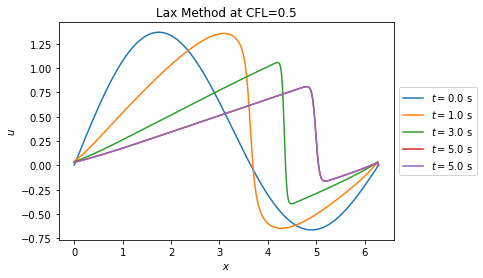

In [3]:
countlax = 0
for t in range(0,T):
    unp1[0] = 0.5*(u[1]+u[nx-2]) - 0.25*nu*(u[1]**2 - u[nx-2]**2)
    for i in range(1,nx-1):
        countlax +=1
        unp1[i] = 0.5*(u[i+1]+u[i-1]) - 0.25*nu*(u[i+1]**2 - u[i-1]**2)
    unp1[i] = 0.5*(u[1]+u[i-1]) - 0.25*nu*(u[1]**2 - u[i-1]**2)
    u=np.copy(unp1)
    if (t==0 or t==100 or t==300 or t==500):
        string = '$t =$' + str(t*dt) + ' s'
        plt.plot(x,u,label=string)
uL = np.copy(u)    
string = '$t =$' + str((t+1)*dt) + ' s'
plt.plot(x,u,label=string)
string = '$t =$' + str((t+1)*dt) + ' s'
plt.plot(x,u,label=string)
plt.xlabel('$x$')
plt.ylabel('$u$')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Lax Method at CFL=0.5')
print(countlax)

### Lax-Wendroff Method

156500


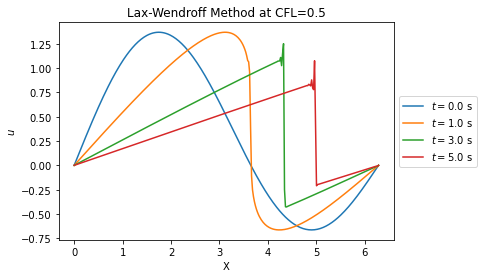

In [4]:
u = np.copy(u0)
countlaxwen = 0
for t in range(0,T):
    Ajp = 0.5*(u[0] + u[1])
    Ajm = 0.5*(u[0] + u[nx-2])
    unp1[0] = u[0] - 0.25*nu*(u[1]**2 - u[nx-2]**2) \
                  + 0.5*(nu**2)*(0.5*Ajp*(u[1]**2 - u[0]**2) \
                                 - 0.5*Ajm*(u[0]**2 - u[nx-2]**2)      )
    for i in range(1,nx-1):
        countlaxwen += 1
        Ajp = 0.5*(u[i] + u[i+1])
        Ajm = 0.5*(u[i] + u[i-1])
        unp1[i] = u[i] - 0.25*nu*(u[i+1]**2 - u[i-1]**2) \
                  + 0.5*(nu**2)*(0.5*Ajp*(u[i+1]**2 - u[i]**2) \
                                 - 0.5*Ajm*(u[i]**2 - u[i-1]**2)     )
    Ajp = 0.5*(u[i] + u[1])
    Ajm = 0.5*(u[i] + u[i-1])
    unp1[i] = u[i] - 0.25*nu*(u[1]**2 - u[i-1]**2) \
                  + 0.5*(nu**2)*(0.5*Ajp*(u[1]**2 - u[i]**2) \
                                 - 0.5*Ajm*(u[i]**2 - u[i-1]**2)   )
    u=np.copy(unp1)
    if (t==0 or t==100 or t==300 or t==500):
        string = '$t =$' + str(t*dt) + ' s'
        plt.plot(x,u,label=string)
uLW = np.copy(u)
string = '$t =$' + str((t+1)*dt) + ' s'
plt.plot(x,u,label=string)
plt.xlabel('X')
plt.ylabel('$u$')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Lax-Wendroff Method at CFL=0.5')
print(countlaxwen)

### MacCormack Method

314001


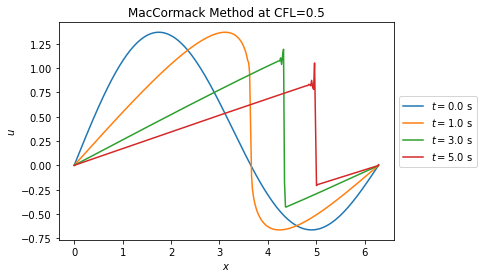

In [5]:
u = np.copy(u0)
countmac = 0
countmac += 1
for t in range(0,T):
    if (t % 2 == 0): # even time; use forward for predictor, backward for corrector
        #forwards predictor step
        for i in range(0,nx-1):
            countmac += 1
            ustar[i] = u[i] - 0.5*nu*(u[i+1]**2 - u[i]**2)
        ustar[i] = u[i] - 0.5*nu*(u[1]**2 - u[i]**2)
        
        #backwards corrector step
        unp1[0] = 0.5*( u[0] + ustar[0] - 0.5*nu*(ustar[0]**2 - ustar[nx-2]**2))
        for i in range(1,nx):
            countmac += 1
            unp1[i] = 0.5*( u[i] + ustar[i] - 0.5*nu*(ustar[i]**2 - ustar[i-1]**2))
            
    else: # odd time; use backward for predictor, forward for corrector
        # backwards predictor step
        ustar[0] = u[0] - 0.5*nu*(u[0]**2 - u[nx-2]**2)
        for i in range(1,nx):
            countmac += 1
            ustar[i] = u[i] - 0.5*nu*(u[i]**2 - u[i-1]**2)
        
        #forwards corrector
        for i in range(0,nx-1):
            countmac += 1
            unp1[i] = 0.5*( u[i] + ustar[i] - 0.5*nu*(ustar[i+1]**2 - ustar[i]**2))
        unp1[i] = 0.5*( u[i] + ustar[i] - 0.5*nu*(ustar[1]**2 - ustar[i]**2))
    
    u=np.copy(unp1)

    if (t==0 or t==100 or t==300 or t==500):
        string = '$t =$' + str(t*dt) + ' s'
        plt.plot(x,u,label=string)
    
uM = np.copy(u)
string = '$t =$' + str((t+1)*dt) + ' s'
plt.plot(x,u,label=string)
plt.xlabel('$x$')
plt.ylabel('$u$')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('MacCormack Method at CFL=0.5')
print(countmac)

### Comparison of Methods

Text(0.5, 1.0, 'Comparison of Solutions at $t$ = 5 s')

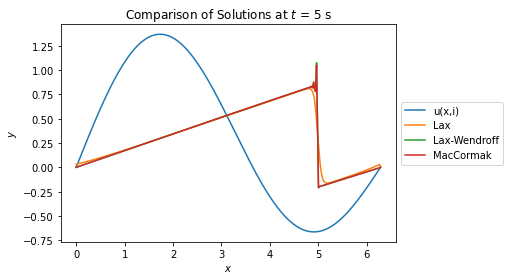

In [6]:
plt.plot(x,u0,label='u(x,i)')
plt.plot(x,uL,label='Lax')
plt.plot(x,uLW,label='Lax-Wendroff')
plt.plot(x,uM,label='MacCormak')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Comparison of Solutions at $t$ = 5 s')


The above showns the comparison of the solution at 5 seconds. Unfortunately, it is hard to get a good view of each methods behaviour.
In the graph below, the axises have been adjusted to zoom in on the end of the discontinuity of the solution. 

Text(0.5, 1.0, 'Comparison of Solutions at $t$ = 5 s')

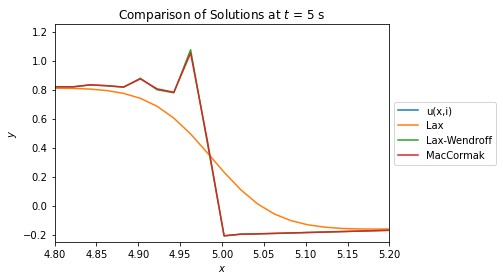

In [7]:
plt.xlim([4.8, 5.2])
plt.ylim([-.25, 1.25])
plt.plot(x,u0,label='u(x,i)')
plt.plot(x,uL,label='Lax')
plt.plot(x,uLW,label='Lax-Wendroff')
plt.plot(x,uM,label='MacCormak')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Comparison of Solutions at $t$ = 5 s')

Upon looking closer at the schemes, it appears that Lax-Wendroff and MacCormak are nearly identical. These two methods both illustrate high frequency oscillations just before the break, also known as dispersive errors, which shows the sudden discontinuity quite well.
Lax on the other hand shows a good example of gradual smearing to smooth out the sharp discontinuity, as seen in the smooth orange curves. This can cause errors in the solution by missing points of the solution. 

Each method effiency was checked by running counter in the nested for-loops, which counted each time the loop was iterated through. This showed that both Lax and Lax-Wendroff has the same number loops, while MacCormack had double. This was due to the backward and forward portions of its method. These are tablized below. 

In [8]:
table = [['Method','Computations','Order of Accuracy','y-Value'],['Lax Method',countlax,'First Order','0.2'],
         ['Lax-Wendroff Method',countlaxwen,'Second Order','-0.2'],
         ['MacCormack Method',countmac,'Second Order','-0.2']]
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═════════════════════╤════════════════╤═════════════════════╤═══════════╕
│ Method              │   Computations │ Order of Accuracy   │   y-Value │
╞═════════════════════╪════════════════╪═════════════════════╪═══════════╡
│ Lax Method          │         156500 │ First Order         │       0.2 │
├─────────────────────┼────────────────┼─────────────────────┼───────────┤
│ Lax-Wendroff Method │         156500 │ Second Order        │      -0.2 │
├─────────────────────┼────────────────┼─────────────────────┼───────────┤
│ MacCormack Method   │         314001 │ Second Order        │      -0.2 │
╘═════════════════════╧════════════════╧═════════════════════╧═══════════╛


---
### Courants Effect On Lax-Wendroff

By raising and lowering the CFL Number by a factor of 50%, comparisons can be made on the sensitivity of the Courant Number. 

Step size = 0.013340096193587232 s
Number of x nodes = 472
235000


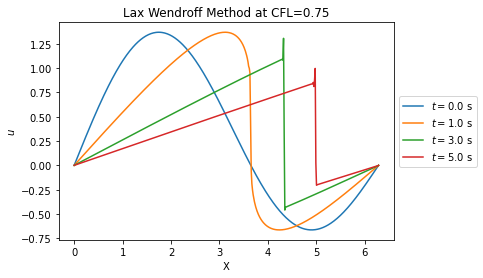

In [9]:
# CFL number
nu = 0.75      
dx = dt/nu       
x = np.linspace(0,L,math.ceil(L/(dt/nu)))
dx = x[1]-x[0]
print('Step size =', dx, 's')
nx = x.size
print('Number of x nodes =', nx)
u0 = np.sin(x) + 0.5*np.sin(0.5*x)
u = np.copy(u0)
ustar = np.zeros(u.size)
unp1 = np.zeros(u.size)
u = np.copy(u0)
countlaxwen = 0
for t in range(0,T):
    Ajp = 0.5*(u[0] + u[1])
    Ajm = 0.5*(u[0] + u[nx-2])
    unp1[0] = u[0] - 0.25*nu*(u[1]**2 - u[nx-2]**2) \
                  + 0.5*(nu**2)*(0.5*Ajp*(u[1]**2 - u[0]**2) \
                                 - 0.5*Ajm*(u[0]**2 - u[nx-2]**2)        )
    for i in range(1,nx-1):
        countlaxwen += 1
        Ajp = 0.5*(u[i] + u[i+1])
        Ajm = 0.5*(u[i] + u[i-1])
        unp1[i] = u[i] - 0.25*nu*(u[i+1]**2 - u[i-1]**2) \
                  + 0.5*(nu**2)*(0.5*Ajp*(u[i+1]**2 - u[i]**2) \
                               - 0.5*Ajm*(u[i]**2 - u[i-1]**2)        )
    Ajp = 0.5*(u[i] + u[1])
    Ajm = 0.5*(u[i] + u[i-1])
    unp1[i] = u[i] - 0.25*nu*(u[1]**2 - u[i-1]**2) \
                  + 0.5*(nu**2)*(0.5*Ajp*(u[1]**2 - u[i]**2) \
                                 - 0.5*Ajm*(u[i]**2 - u[i-1]**2)                  )
    u=np.copy(unp1)
    if (t==0 or t==100 or t==300 or t==500):
        string = '$t =$' + str(t*dt) + ' s'
        plt.plot(x,u,label=string)
uLW75 = np.copy(u)
string = '$t =$' + str((t+1)*dt) + ' s'
plt.plot(x,u,label=string)
plt.xlabel('X')
plt.ylabel('$u$')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Lax Wendroff Method at CFL=0.75')
print(countlaxwen)

Step size = 0.0400202885807617 s
Number of x nodes = 158
78000


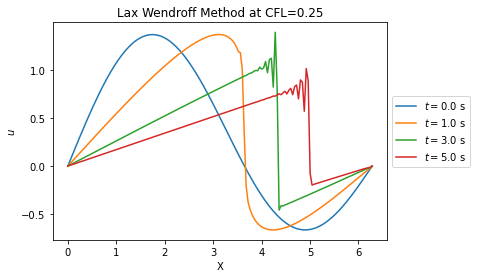

In [10]:
# CFL number
nu = 0.25     
dx = dt/nu       
x = np.linspace(0,L,math.ceil(L/(dt/nu)))
dx = x[1]-x[0]
print('Step size =', dx, 's')
nx = x.size
print('Number of x nodes =', nx)
u0 = np.sin(x) + 0.5*np.sin(0.5*x)
u = np.copy(u0)
ustar = np.zeros(u.size)
unp1 = np.zeros(u.size)
u = np.copy(u0)
countlaxwen = 0
for t in range(0,T):
    Ajp = 0.5*(u[0] + u[1])
    Ajm = 0.5*(u[0] + u[nx-2])
    unp1[0] = u[0] - 0.25*nu*(u[1]**2 - u[nx-2]**2) \
                  + 0.5*(nu**2)*(0.5*Ajp*(u[1]**2 - u[0]**2) \
                                 - 0.5*Ajm*(u[0]**2 - u[nx-2]**2)       )
    for i in range(1,nx-1):
        countlaxwen += 1
        Ajp = 0.5*(u[i] + u[i+1])
        Ajm = 0.5*(u[i] + u[i-1])
        unp1[i] = u[i] - 0.25*nu*(u[i+1]**2 - u[i-1]**2) \
                  + 0.5*(nu**2)*(0.5*Ajp*(u[i+1]**2 - u[i]**2) \
                                 - 0.5*Ajm*(u[i]**2 - u[i-1]**2)      )
    Ajp = 0.5*(u[i] + u[1])
    Ajm = 0.5*(u[i] + u[i-1])
    unp1[i] = u[i] - 0.25*nu*(u[1]**2 - u[i-1]**2) \
                  + 0.5*(nu**2)*(0.5*Ajp*(u[1]**2 - u[i]**2) \
                                 - 0.5*Ajm*(u[i]**2 - u[i-1]**2)                      )
    u=np.copy(unp1)
    if (t==0 or t==100 or t==300 or t==500):
        string = '$t =$' + str(t*dt) + ' s'
        plt.plot(x,u,label=string)
uLW25 = np.copy(u)
string = '$t =$' + str((t+1)*dt) + ' s'
plt.plot(x,u,label=string)
plt.xlabel('X')
plt.ylabel('$u$')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Lax Wendroff Method at CFL=0.25')
print(countlaxwen)

The graph below compares the sensitivity Courant has on the Lax-Wendroff method. It shows that as the courant approaches closer to 1, its stablity and accuracy improves. At the smaller value of 0.25, the disperse errors are much greater than at 0.5 and 0.75. This of course only works approaching one, and not over. 

![Lax-Wendroff Compare](https://raw.githubusercontent.com/nick3516/ENGR491/main/laxwen.png?token=AUW5UKTHLV5HRD5XTVPBZVTBOYYEC)

---
### Courants Effect on Lax Method

Step size = 0.0400202885807617 s
Number of x nodes = 158
78000


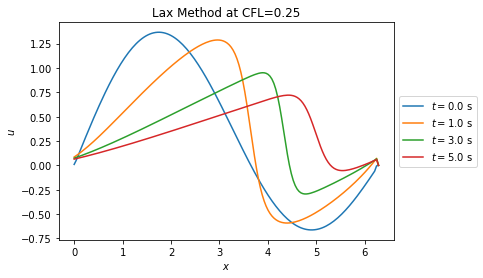

In [11]:
# CFL number
nu = 0.25     
dx = dt/nu       
x = np.linspace(0,L,math.ceil(L/(dt/nu)))
dx = x[1]-x[0]
print('Step size =', dx, 's')
nx = x.size
print('Number of x nodes =', nx)
u0 = np.sin(x) + 0.5*np.sin(0.5*x)
u = np.copy(u0)
ustar = np.zeros(u.size)
unp1 = np.zeros(u.size)
u = np.copy(u0)
x = np.linspace(0,L,math.ceil(L/(dt/nu)))
countlax = 0
for t in range(0,T):
    unp1[0] = 0.5*(u[1]+u[nx-2]) - 0.25*nu*(u[1]**2 - u[nx-2]**2)
    for i in range(1,nx-1):
        countlax +=1
        unp1[i] = 0.5*(u[i+1]+u[i-1]) - 0.25*nu*(u[i+1]**2 - u[i-1]**2)
    unp1[i] = 0.5*(u[1]+u[i-1]) - 0.25*nu*(u[1]**2 - u[i-1]**2)
    u=np.copy(unp1)
    if (t==0 or t==100 or t==300 or t==500):
        string = '$t =$' + str(t*dt) + ' s'
        plt.plot(x,u,label=string)    
uL = np.copy(u)    
string = '$t =$' + str((t+1)*dt) + ' s'
plt.plot(x,u,label=string)
plt.xlabel('$x$')
plt.ylabel('$u$')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Lax Method at CFL=0.25')
print(countlax)

Step size = 0.013340096193587232 s
Number of x nodes = 472
235000


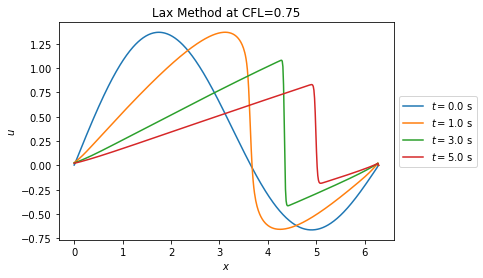

In [12]:
# CFL number
nu = 0.75     
# time step
dt = 0.01         
# max number of time steps
T = 500
# space step
dx = dt/nu       
# length
L = 2*math.pi

# Define space vector
x = np.linspace(0,L,math.ceil(L/(dt/nu)))
dx = x[1]-x[0]
print('Step size =', dx, 's')
nx = x.size
print('Number of x nodes =', nx)

## Define initial conditions
u0 = np.sin(x) + 0.5*np.sin(0.5*x)
u = np.copy(u0)
ustar = np.zeros(u.size)
unp1 = np.zeros(u.size)
countlax = 0
u = np.copy(u0)
for t in range(0,T):
    unp1[0] = 0.5*(u[1]+u[nx-2]) - 0.25*nu*(u[1]**2 - u[nx-2]**2)
    for i in range(1,nx-1):
        countlax +=1
        unp1[i] = 0.5*(u[i+1]+u[i-1]) - 0.25*nu*(u[i+1]**2 - u[i-1]**2)

    unp1[i] = 0.5*(u[1]+u[i-1]) - 0.25*nu*(u[1]**2 - u[i-1]**2)
    u=np.copy(unp1)
    
    if (t==0 or t==100 or t==300 or t==500):
        string = '$t =$' + str(t*dt) + ' s'
        plt.plot(x,u,label=string)
        
uL = np.copy(u)    
string = '$t =$' + str((t+1)*dt) + ' s'
plt.plot(x,u,label=string)
plt.xlabel('$x$')
plt.ylabel('$u$')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Lax Method at CFL=0.75')
print(countlax)

The graph below compares the sensitivity Courant has on the Lax method. It shows that as the courant approaches closer to 1, its accuracy improves. At the smaller value of 0.25, the discontinuity is greatly smoothed compared to the solution at 0.5, while when the courant is increased to 0.75, the discontinuety is apparent without the addition of disperse errors

![Lax-Wendroff Compare](https://raw.githubusercontent.com/nick3516/ENGR491/main/lax.png?token=AUW5UKR75CVGEV5EIO2L7SDBOYYFG)

---
### Courants Effect on MacCormack Method

Step size = 0.0400202885807617 s
Number of x nodes = 158
157001


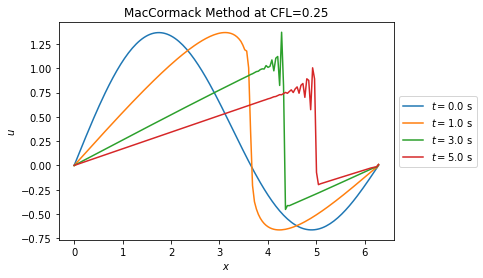

In [13]:
# CFL number
nu = 0.25     
dx = dt/nu       
x = np.linspace(0,L,math.ceil(L/(dt/nu)))
dx = x[1]-x[0]
print('Step size =', dx, 's')
nx = x.size
print('Number of x nodes =', nx)
u0 = np.sin(x) + 0.5*np.sin(0.5*x)
u = np.copy(u0)
ustar = np.zeros(u.size)
unp1 = np.zeros(u.size)
u = np.copy(u0)
countmac = 0
countmac += 1
for t in range(0,T):
    if (t % 2 == 0): 
        for i in range(0,nx-1):
            countmac += 1
            ustar[i] = u[i] - 0.5*nu*(u[i+1]**2 - u[i]**2)
        ustar[i] = u[i] - 0.5*nu*(u[1]**2 - u[i]**2)
        unp1[0] = 0.5*( u[0] + ustar[0] - 0.5*nu*(ustar[0]**2 - ustar[nx-2]**2))
        for i in range(1,nx):
            countmac += 1
            unp1[i] = 0.5*( u[i] + ustar[i] - 0.5*nu*(ustar[i]**2 - ustar[i-1]**2))  
    else: 
        ustar[0] = u[0] - 0.5*nu*(u[0]**2 - u[nx-2]**2)
        for i in range(1,nx):
            countmac += 1
            ustar[i] = u[i] - 0.5*nu*(u[i]**2 - u[i-1]**2)
        for i in range(0,nx-1):
            countmac += 1
            unp1[i] = 0.5*( u[i] + ustar[i] - 0.5*nu*(ustar[i+1]**2 - ustar[i]**2))
        unp1[i] = 0.5*( u[i] + ustar[i] - 0.5*nu*(ustar[1]**2 - ustar[i]**2))
    u=np.copy(unp1)
    if (t==0 or t==100 or t==300 or t==500):
        string = '$t =$' + str(t*dt) + ' s'
        plt.plot(x,u,label=string)
uM = np.copy(u)
string = '$t =$' + str((t+1)*dt) + ' s'
plt.plot(x,u,label=string)
plt.xlabel('$x$')
plt.ylabel('$u$')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('MacCormack Method at CFL=0.25')
print(countmac)

Step size = 0.013340096193587232 s
Number of x nodes = 472
471001


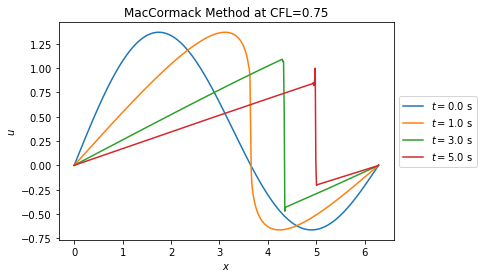

In [14]:
# CFL number
nu = 0.75   
dx = dt/nu       
x = np.linspace(0,L,math.ceil(L/(dt/nu)))
dx = x[1]-x[0]
print('Step size =', dx, 's')
nx = x.size
print('Number of x nodes =', nx)

u0 = np.sin(x) + 0.5*np.sin(0.5*x)
u = np.copy(u0)
ustar = np.zeros(u.size)
unp1 = np.zeros(u.size)
u = np.copy(u0)
countmac = 0
countmac += 1
for t in range(0,T):
    if (t % 2 == 0): 
        for i in range(0,nx-1):
            countmac += 1
            ustar[i] = u[i] - 0.5*nu*(u[i+1]**2 - u[i]**2)
        ustar[i] = u[i] - 0.5*nu*(u[1]**2 - u[i]**2)
        unp1[0] = 0.5*( u[0] + ustar[0] - 0.5*nu*(ustar[0]**2 - ustar[nx-2]**2))
        for i in range(1,nx):
            countmac += 1
            unp1[i] = 0.5*( u[i] + ustar[i] - 0.5*nu*(ustar[i]**2 - ustar[i-1]**2))
    else: 
        ustar[0] = u[0] - 0.5*nu*(u[0]**2 - u[nx-2]**2)
        for i in range(1,nx):
            countmac += 1
            ustar[i] = u[i] - 0.5*nu*(u[i]**2 - u[i-1]**2)
        for i in range(0,nx-1):
            countmac += 1
            unp1[i] = 0.5*( u[i] + ustar[i] - 0.5*nu*(ustar[i+1]**2 - ustar[i]**2))
        unp1[i] = 0.5*( u[i] + ustar[i] - 0.5*nu*(ustar[1]**2 - ustar[i]**2))
    u=np.copy(unp1)
    if (t==0 or t==100 or t==300 or t==500):
        string = '$t =$' + str(t*dt) + ' s'
        plt.plot(x,u,label=string)
uM = np.copy(u)
string = '$t =$' + str((t+1)*dt) + ' s'
plt.plot(x,u,label=string)
plt.xlabel('$x$')
plt.ylabel('$u$')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('MacCormack Method at CFL=0.75')
print(countmac)

In a similar fashion to the Lax-Wendroff Method, the graph below compares the sensitivity Courant has on the MacCormack. It shows that as the courant approaches closer to 1, its stablity and accuracy improves. At the smaller value of 0.25, the disperse errors are much greater than at 0.5 and 0.75. This of course only works approaching one, and not over. This is again nearly identical to that of the Lax-Wendroff

![Lax-Wendroff Compare](https://raw.githubusercontent.com/nick3516/ENGR491/main/mac2.png?token=AUW5UKS37GYGFL6URUAY2H3BOYYSI)

---